Edgar Ruiz Tovar

13 de junio de 2025. Querétaro, Qro.

# Transformada rapida de Fourier

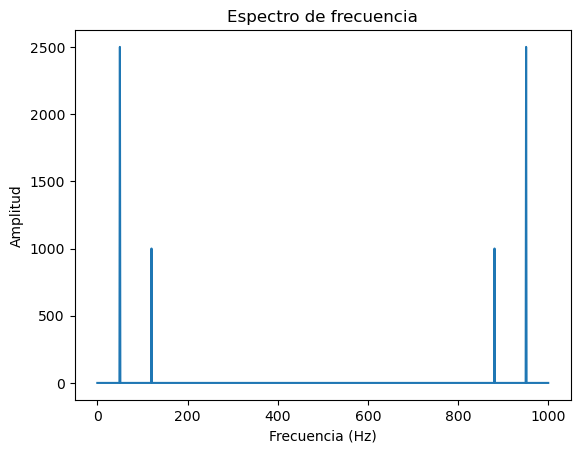

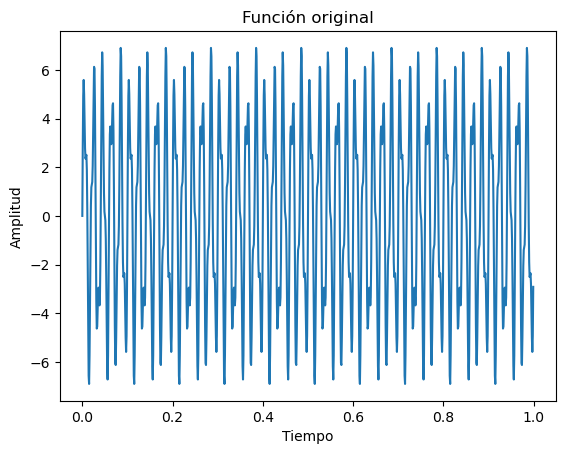

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Definir la señal en el dominio del tiempo
Fs=1000 #Frecuencia de muestreo
ts=1/Fs #Tiempo de muestreo
t=np.arange(0,1,ts)

x=5*np.sin(2*np.pi*50*t)+2*np.sin(2*np.pi*120*t)

#Aplicando la transformada de Fourier
X=np.fft.fft(x) #np.fft.fft(x) porque np.fft(x) es sólo el módulo que contiene la función fft

#Espacio de frecuencias
f=np.linspace(0,Fs,len(x))

#Gráfico del espectro de frecuencia
plt.figure(1)
plt.plot(f,np.abs(X))
plt.title('Espectro de frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')

#Gráfico de la función original
plt.figure(2)
plt.plot(t,x)
plt.title('Función original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.show()

## Interpretación
Lo que se aplica es la transformada rápida de Fourier, esto nos permite representar la señal en sus componentes principales de frecuencia, siendo la gráfica 1 el espectro, donde nos muestra que hay un pico notorio en los 50 Hz (aproximadamente).

C:\Users\ed_22\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


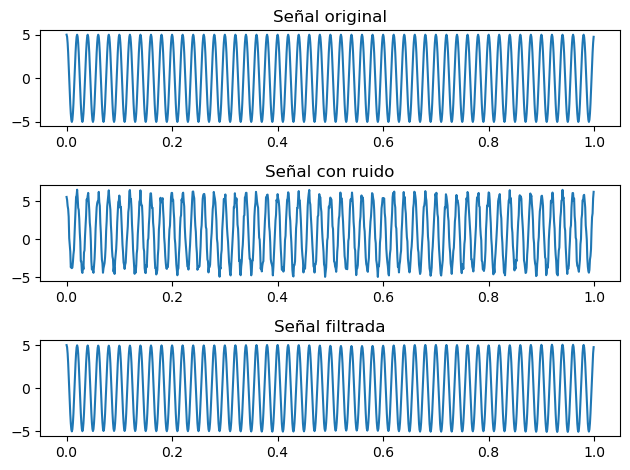

In [2]:
#Definir la señal en el dominio del tiempo
Fs=1000
ts=1/Fs
t=np.arange(0,1,ts)

#Función de entrada
x=5*np.cos(2*np.pi*50*t) #Señal sin ruido

x_ruido=x+1.5*np.random.rand(len(t))

#Transformada de Fourier
X=np.fft.fft(x_ruido)

#Diseñar un filtro pasabajas en el dominio de la frecuencia
N=len(x)

f=np.fft.fftfreq(N,d=(t[1])-t[0]) #Vector de frecuencias

frecuencia_corte=50 #Frecuencia de corte
filtro=np.abs(f)>(frecuencia_corte-5)
filtro2=np.abs(f)<(frecuencia_corte+5)

#Aplicando el filtro
X_filtrada=X*filtro*filtro2

#Transformada inversa de Fourier para ver el resultado
x_filtrada=np.fft.ifft(X_filtrada)

#Graficando las señales original y filtrada
plt.figure()
plt.subplot(3,1,1)
plt.plot(t,x)
plt.title('Señal original')

plt.subplot(3,1,2)
plt.plot(t,x_ruido)
plt.title('Señal con ruido')

plt.subplot(3,1,3)
plt.plot(t,x_filtrada)
plt.title('Señal filtrada')

plt.tight_layout()
plt.show()

## Interpretación
Ahora tenemos el caso de la aplicación de la transformada rápida para hacer el filtrado. Quizá no se puede apreciar tan bien, pero la señal con ruido se un poco más sucia.

A mi parecer si se disminuye el intervalo de tiempo (como se muestra a continuación) esto es más apreciable.

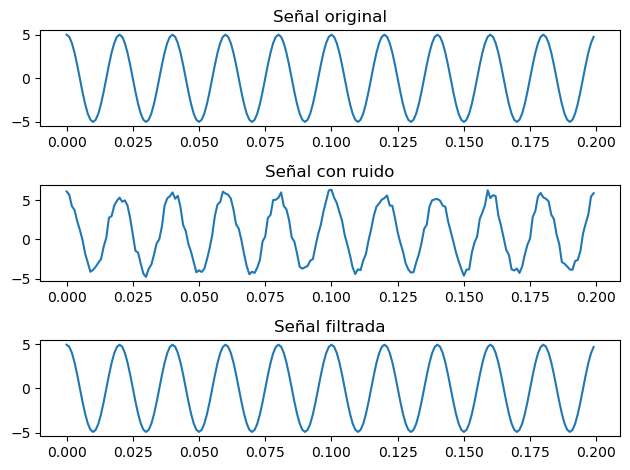

In [3]:
#Definir la señal en el dominio del tiempo
Fs=1000
ts=1/Fs
t=np.arange(0,0.2,ts)

#Función de entrada
x=5*np.cos(2*np.pi*50*t) #Señal sin ruido

x_ruido=x+1.5*np.random.rand(len(t))

#Transformada de Fourier
X=np.fft.fft(x_ruido)

#Diseñar un filtro pasabajas en el dominio de la frecuencia
N=len(x)

f=np.fft.fftfreq(N,d=(t[1])-t[0]) #Vector de frecuencias

frecuencia_corte=50 #Frecuencia de corte
filtro=np.abs(f)>(frecuencia_corte-5)
filtro2=np.abs(f)<(frecuencia_corte+5)

#Aplicando el filtro
X_filtrada=X*filtro*filtro2

#Transformada inversa de Fourier para ver el resultado
x_filtrada=np.fft.ifft(X_filtrada)

#Graficando las señales original y filtrada
plt.figure()
plt.subplot(3,1,1)
plt.plot(t,x)
plt.title('Señal original')

plt.subplot(3,1,2)
plt.plot(t,x_ruido)
plt.title('Señal con ruido')

plt.subplot(3,1,3)
plt.plot(t,x_filtrada)
plt.title('Señal filtrada')

plt.tight_layout()
plt.show()

# Preguntas
## Aplciación tesis
Cuando se estudia en Machine Learning el aprendizaje no supervisado, hay en particular un problema que me recordó mucho a lo que está haciendo del filtrado. Este problema es el de la reducción de la dimensionalidad, la cual puede ser aplicada con el algoritmo de Análisis de Compenentes Principales (PCA) para disminuir el tamaño de las imágenes pero sin perder calidad.

Creo que de hecho puede ser un buen tema de tesis :)

## ¿Qué me llevo?
Nunca había visto un desarrollo del filtrado de señales aplicando la Transformada rápida de Fourier, me llevo que se puede hacer y un código que me sirve de bosquejo para implementarlo.